# Jugando con el notebook "Modelling RV data of 51 Peg b".

## Esto es un entrenamiento para la tesis de maestría sobre exoplanetas que haré con Óscar y Erick. La notebook de Óscar puede hallarse  <a href="https://github.com/oscaribv/exoplanetas_y_otros_demonios/blob/master/51Pegb.ipynb">aquí</a>. Esta es parte del curso que dio en Bucaramanga, Santander, Colombia, en 2019.  En él, se "redescubrió" 51 Peg b (el primer planeta extrasolar en ser detectado). El planeta fue descubierto en 1995 por Didier Queloz y Michael Mayor usando el método de velocidad radial. En el curso en Bucaramanga se usaron los datos del artículo original de Queloz y Mayor para determinar los parámetros de 51 Peg b mediante un análisis de la velocidad radial de la estrella que orbita 51 Peg b.

In [29]:
#Importamos las librerías principales
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Ahora definiremos una función que nos ayude a calcular la velocidad radial de la estrella respecto al baricentro.  Por facilidad, asumiremos que la órbita es circular, de manera que la gráfica teórica de velocidad radial resultará en una función senoidal perfecta.

In [30]:
#Escribamos una función que calcule la velocidad radial VR para una órbita circular.
#Esta función estará (valga la redundancia)en función del tiempo y de los parámetros del sistema.
#El tiempo "t" es un vector con N componentes (Esto indica básicamente que para cada tiempo hay una medición).
#Los otros parámetros del sistema son:
#params[0] -> vz -> Velocidad sistémica de la estrella o movimiento propio del centro de masas.
#params[1] -> K  -> Semi-amplitud Doppler de la velocidad Radial
#params[2] -> P  -> Período orbital.
#params[3] -> t0 -> Tiempo de conjunción mínima. 
#Esta función regresa un vector de N elementos, uno para cada valor de t.
def calcula_RV(t,params):
    vz = params[0]
    K  = params[1]
    P  = params[2]
    t0 = params[3]
    vr = vz - K * np.sin(2*np.pi*(t-t0)/P)
    return vr

## No sabemos si la función "calcula RV" efectivamente puede graficar algo. Así que meteremos valores aleatorios del tiempo "t" para ver qué  ocurre. 

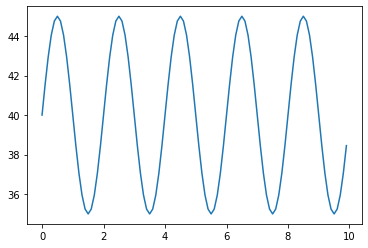

In [31]:
#Vamos a darle a "t" valores de 0 a 10 días, con puntos o mediciones cada 0.1 días. 
t = np.arange(0,10,0.1)
#Ahora daremos valores para los parámetros.
vz = 40 #km/s
K = 5   #km/s
P = 2   #days
t0 = 13 #days
#Llamamos a la función.
vr = calcula_RV(t, [vz,K, P,t0])
plt.plot(t,vr)
#################################################MUCHO OJO!!!######################################################
#Jugar con los parámetros es muy importante! Cambiarlos ayuda mucho para ver cómo la gráfica también puede variar.

## Ya sabemos que nuestra linda función sí puede graficar cosas. Así que es hora de ir por datos reales!

## Trabajaremos con los datos de 51 Peg b, los cuales fueron usados por Mayor y Queloz para publicar su artículo con el que ganaron el Nobel, el cual está  <a href="https://web.pa.msu.edu/courses/2011spring/AST208/mayorQueloz.pdf">aquí mero</a>. En cambio, los datos se pueden hallar <a href="https://github.com/oscaribv/exoplanetas_y_otros_demonios/blob/master/51peg.dat">acá</a>. A continuación, graficaremos estos datos.

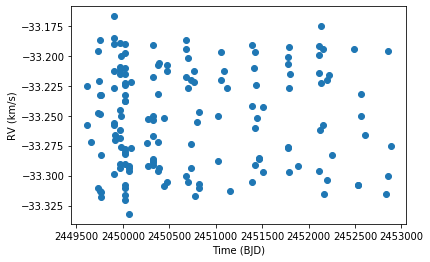

In [32]:
#Ahora leeremos los datos del archivo 51peg.dat. En este archivo se encuentran los datos tomados
#por el intrumento ELODIE. 
td, rvd, ed = np.loadtxt('51peg.dat',unpack=True,usecols=[0,1,2])
#El archivo tiene 3 columnas, además de los encabezados.
#En la primer columna está el tiempo(Días Julianos).
#En la segunda columna, los datos de la velocidad radial de la estrella(En km/s).
#En la tercera columna, el error de esas mediciones de velocidad radial(Tamibén en km/s).
########YA TENEMOS LAS OBSERVACIONES QUE VALIERON UN PREMIO NOBEL!!!######
#Ahora, a graficar estos datos.
plt.plot(td,rvd,'o')
#Ponemos el tiempo en el eje x. En este caso, en una unidad llamada Barycentric Julian Date (BJD)
plt.xlabel('Time (BJD)')
#Ponemos la velocidad radial en el eje y, en km/s
plt.ylabel('RV (km/s)')
plt.show()

## Ya tenemos graficados los datos de velocidad radial! Como se ve, una función senoidal puede ajustárseles. Podemos ver además que la velocidad radial va de -33.325 km/s a -33.175km/s. El signo negativo indica que la estrella se acerca a nosotros! La velocidad radial promedio es entonces -33.25km/s. Justo a esta velocidad se nota la mayor dispersión en la gráfica. Esto es una pista! Nos dice que *el planeta está empujando la estrella*. Ahora, hay que ajustar un modelo a estos datos!

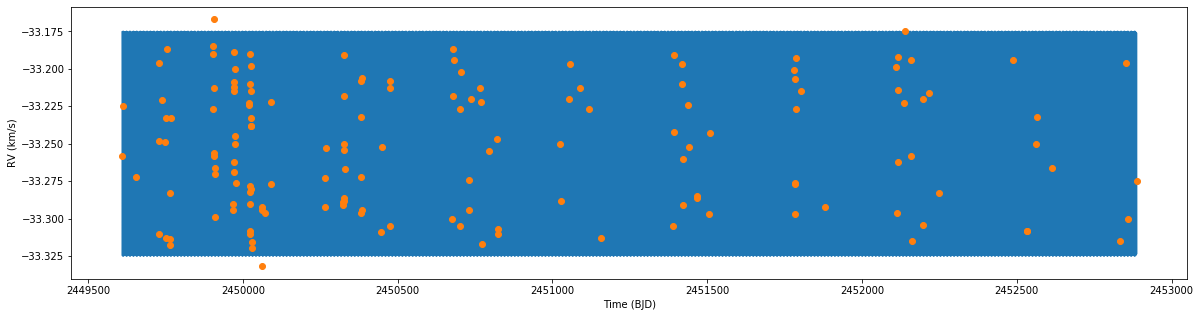

In [33]:
#Ahora usaremos nuestra función ya hecha, "calcula_RV" para ajustarla a los datos que acabamos de graficar.

#Lo primero que debemos hacer es darl un valor adecuado al tiempo. En este caso, irá del mínimo de td
# al máximo de td, ya habrá puntos en la gráfica en intervalos de 0.11.
t = np.arange(min(td),max(td),0.11)
#Ahora podemos darle valores a los parámetros orbitales según la gráfica anterior.
vz = -33.25
K  = 0.075
P  = 2.
t0 = 13.
#Ahora calculamos nuestra función.
vr = calcula_RV(t, [vz,K,P,t0])
#Ahora grafiquemos juntos el modelo y los datos.

#Estas líneas grafican el modelo
plt.figure(figsize=(20,5))
plt.plot(t,vr)
#Esta línea grafica los datos
plt.plot(td,rvd,'o')
#Estas líneas ponen los textos correctos en los dos ejes
plt.xlabel('Time (BJD)')
plt.ylabel('RV (km/s)')
plt.show()

## Parece que graficamos las obersevaciones delante de un fondo azul! Ese fondo azul está hecho de la gráfica senoidal que da nuestra función "calcula_RV". Las líneas están así de juntas porque están puestas cada 0.11 en el eje x, y como el eje x es muy largo ( la ventana temporal es muy grande) tenemos como resultado este espantoso fondo azul. Sea como sea, no podemos sacar mucha información de esta imagen. Una mejor manera de hacer gráficas de velocidad radial es usando la llamada "phase-folded plot". En vez de poner el tiempo en el eje x, uno pone la fracción de la órbita en la cual la velocidad radial es calculada. Esto transforma el eje x en un eje que muestra la fase, que va de 0 a 1. Esto suena más complicado de lo que es.

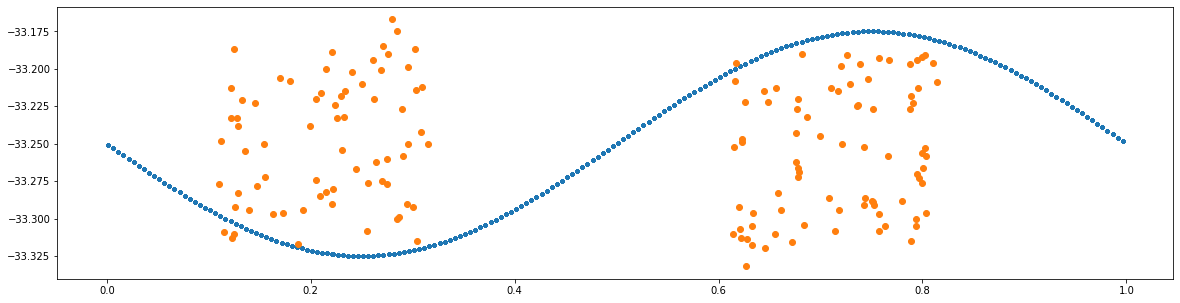

In [34]:
#La fase es calculada como sigue:
#phase = ((t-t0)%P)/P, donde % es la operación módulo y da como resultado el residuo.

phase_model = ((t-t0)%P)/P
phase_data  = ((td-t0)%P)/P

#Ahora volvamos a crear la gráfica anterior, pero con el eje x cambiado a fase.
plt.figure(figsize=(20,5))
#Esta línea grafica el modelo
plt.plot(phase_model,vr,'.')
#Esta línea grafica los datos
plt.plot(phase_data,rvd,'o')
plt.show()

## Ahora debemos asegurar un buen ajuste del modelo a nuestros datos. Para eso usaremos la $\chi ^{2}$ y la función *optimization* de python. La definición de $\chi ^{2}$ es la siguiente:

$$ \chi^{2} = \sum_{i=1}^{N}\left[  \frac{D_{i} - M_{i}}{\sigma_{i}} \right]^{2} $$

## Donde $D_{i}$ es el dato tomado al tiempo $t_{i}$, $M_{i}$ es el modelo en el tiempo $t_{i}$ y $\sigma_{i}$ es el error de $D_{i}$. Ahora debemos preocuparnos por escribir una función que calcule $\chi^{2}$ para un modelo de velocidad radial como el nuestro. Viendo la ecuación de $\chi^{2}$, advertimos que debemos dar al modelo varios parámetros. Nuestras observaciones constan de tres parámetros, el tiempo, la velocidad radial y sus errores. Nuestro modelo, en cambio, consta de 4 parámetros: vz, K, P y t0.

In [38]:
#Vamos a crear una función que calcule la chi^{2} para nuestro modelo.
#Las variables de entrada para esta función que calcula chi^{2} son:
#param -> un vector que contiene a los parámetros del modelo, que en este caso son 4.
#t     -> un vector con todo el tiempo de observación
#y     -> mediciones de velocidad radial RV
#e     -> los errores asociados a esas mediciones 
#Esta función regresa el valor numérico de chi^{2}
def chi2(param,t,y,e):
    #Primero necesitamos calcular los valores del modelo que corresponden 
    #a cada uno de los valores de las observaciones.
    #Podemos obtener eso fácilmente con la función "calcula_RV"
    vr = calcula_RV(t,param)
    #Ahora ya podemos calcular la chi^{2} 
    chi2 = np.sum(1./2. * ( (vr - y) / e)**2)
    return chi2

#Ahora apliquemos esta función chi2 a nuestro modelo
chi = chi2([vz,K,P,t0],td,rvd,ed)
print('La chi cuadrada de nuestro modelo es:', chi)

La chi cuadrada de nuestro modelo es: 10080.537647214194


## Nuestra $\chi^{2}$ es enorme. Es momento de minimizarla. Hay varias formas de hacer esto. Nosotros usaremos una rutina de python específica, llamada "*fmin*". Información sobre ella puede encontrarse <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html">aquí merengues</a>. 

In [49]:
#Lo primero que debemos hacer es importarla de scipy
from scipy.optimize import fmin

#Metemos los parámetros
vz = -33.250
K = 0.06
P = 4.2
t0 = min(td)

#Ahora hay que decirle a python qué función queremos minimizar, que es chi2
params_final = fmin(chi2,[vz,K,P,t0],args=(td,rvd,ed))

#Ahora imprimiremos los parámetros de nuestro modelo que mejor ajusten a los datos!

print("Minimización completada!")
print("Los mejores parámetros son estos meros:")
print("VZ = ",params_final[0]," km/s")
print("K  = ",params_final[1]," km/s")
print("P  = ",params_final[2]," days")
print("t0 = ",params_final[3]," BJD")

Optimization terminated successfully.
         Current function value: 238.019395
         Iterations: 182
         Function evaluations: 387
Minimización completada!
Los mejores parámetros son estos meros:
VZ =  -33.25610805215914  km/s
K  =  0.060315265346629704  km/s
P  =  4.2307829278247695  days
t0 =  2527382.923067239  BJD


## Ahora veamos cómo quedan nuestro modelo con esos nuevos parámetros optimizados!

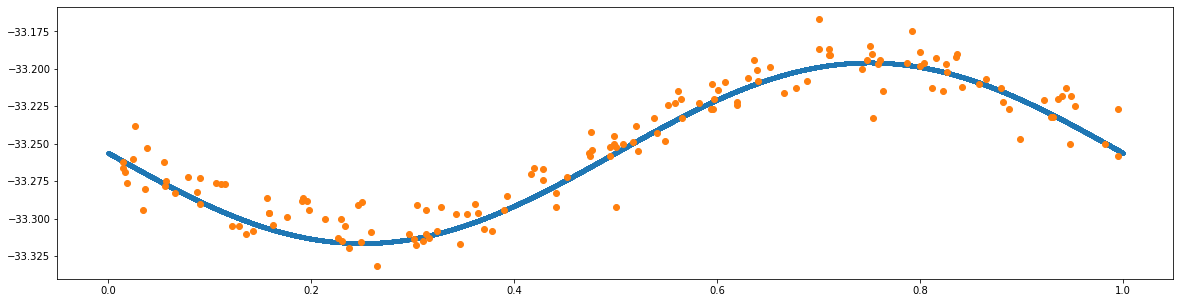

In [41]:
#LCreemos primero un vector del tiempo de las observaciones.
t = np.arange(min(td),max(td),0.1)

#NCalculemos la velocidad radial con los parametros optimizados
vr = calcula_RV(t,params_final)

vz = params_final[0]
K  = params_final[1]
P  = params_final[2]
t0 = params_final[3]

#lCambiemos los tiempos en fases
phase_model = ((t-t0)%P)/P
phase_data  = ((td-t0)%P)/P

#Ahora a graficar, a ver si es cierto que muy muy!
plt.figure(figsize=(20,5))
#Con esta línea graficamos el modelo
plt.plot(phase_model,vr,'.')
#Con esta línea graficamos los datos
plt.plot(phase_data,rvd,'o')
plt.show()

## Pero qué maravilla! Ahora lo que nos queda es deducir la masa mínima de nuestro planeta. La ecuación para la masa mínima es la siguiente:

$$ m_{p}sin(i) = K \left( \frac{2 \pi G}{P} \right)^{-\frac{1}{3}} m_{star}^{\frac{2}{3}}(1-e^{2})^{\frac{1}{2}}$$

## Para el caso de una órbita circular, $e = 0$, la ecuación anterior se simplifica a la siguiente:

$$ m_{p}sin(i) = K \left( \frac{2 \pi G}{P}\right)^{-\frac{1}{3}} m_{star}^{\frac{2}{3}}$$

In [50]:
#Ponemos nuestros parámetros en las unidades correctas.
#K está en km/s así que hay que pasarlo a m/s
K_ms = K*1.e3
#P está en días así que hay que pasarlo a segundos
P_s = P*24.*3600.

#Ahora pongamos el valor de algunas constantes

#Valor de la constante gravitacional (SI)
G_SI = 6.67408e-11 #m^3 kg^{-1} s^{-2}
#1 Masa del sol en kg (Si)
M_SUN_SI = 1.989e+30 #kg
# Masa de Júpiter en kg (SI)
M_JUP_SI = 1.899e+27 #kg
# Masa de 51 Peg 
M_51 = 1.11*M_SUN_SI

#Ahora va la masa del planeta en kg
M_pla = K_ms*(2*np.pi*G_SI/P_s)**(-1./3.)*M_51**(2./3.)

#Ahora la convertimos a masa Jovianas
M_planet_jup = M_pla / M_JUP_SI

print("La masa del planeta 51 Peg b es:", M_planet_jup, "Masas de Júpiter")

La masa del planeta 51 Peg b es: 0.5104995681784553 Masas de Júpiter


## Nuestro valore difiere en alrededor de 0.04 del valor reportado por Didier y Queloz en 1995, que fue de $m_psin(i) \sim 0.47$. Obtuvimos una muy buena aproximación!